<a href="https://colab.research.google.com/github/kcat28/CCADMACL_EXERCISES_COM222ML/blob/main/ADML_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2: Use Gradient Boost for Regression

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
Submit your results to:
https://www.kaggle.com/competitions/playground-series-s4e12/overview



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version
import xgboost as xgb
from sklearn.metrics import root_mean_squared_log_error


## Dataset
Train, test and sample submission file can be found in this link
https://www.kaggle.com/competitions/playground-series-s4e12/data

## 1. Load the Data

##Dataset File

In [2]:
pd.set_option('display.max_columns', None) #display all columns

In [3]:
# put your answer here
df = pd.read_csv('train.csv')
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


##Test File

In [4]:
dt = pd.read_csv('test.csv')
dt.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


##Sample Submission File

In [5]:
sf = pd.read_csv('sample_submission.csv')
sf.head()

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545


## 2. Perform Data preprocessing

In [6]:
# put your answer here
df.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [9]:
df.sample(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
246319,246319,35.0,Female,41134.0,Divorced,NaN,Master's,Unemployed,36.567348,Urban,Premium,NaN,11.0,701.0,3.0,2020-02-11 15:21:39.111551,Good,Yes,Rarely,House,105.0
242257,242257,46.0,Female,8058.0,Single,NaN,PhD,NaN,22.845313,Urban,Premium,1.0,16.0,631.0,6.0,2020-08-14 15:21:39.261856,Poor,Yes,Daily,House,1140.0
912802,912802,52.0,Female,26373.0,Married,3.0,PhD,NaN,41.508820,Rural,Premium,2.0,9.0,478.0,1.0,2023-02-22 15:21:39.228521,Average,No,Rarely,Condo,614.0
270029,270029,51.0,Male,18924.0,Divorced,0.0,Bachelor's,Unemployed,10.056448,Urban,Basic,1.0,10.0,NaN,7.0,2024-06-22 15:21:39.150730,Good,No,Daily,Condo,758.0
227833,227833,32.0,Female,14863.0,Divorced,0.0,Master's,Self-Employed,7.985320,Rural,Comprehensive,1.0,11.0,369.0,9.0,2020-04-21 15:21:39.134960,Good,Yes,Weekly,House,2585.0


## encoding categorical features

In [10]:
print(df["Occupation"].unique())

['Self-Employed' nan 'Employed' 'Unemployed']


In [11]:
occupation_mapping = {
    'Self-Employed': 0,
    'Employed': 1,
    'Unemployed': 2
}

df['Occupation'] = df['Occupation'].map(occupation_mapping)
print(df["Occupation"].unique())

[ 0. nan  1.  2.]


In [12]:
df['Occupation'].value_counts()

,count
Occupation,
1.0,282750
0.0,282645
2.0,276530


In [13]:
print(df["Marital Status"].unique())

['Married' 'Divorced' 'Single' nan]


In [14]:
marital_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2
}
df['Marital Status'] = df['Marital Status'].map(marital_mapping)
print(df["Marital Status"].unique())

[ 1.  2.  0. nan]


In [15]:
print(df["Education Level"].unique())

["Bachelor's" "Master's" 'High School' 'PhD']


In [16]:
education_mapping = {
    'High School': 0,
    'Bachelor\'s': 1,
    'Master\'s': 2,
    'PhD': 3
}
df['Education Level'] = df['Education Level'].map(education_mapping)
print(df["Education Level"].unique())

[1 2 0 3]


In [17]:
print(df["Location"].unique())

['Urban' 'Rural' 'Suburban']


In [18]:
location_mapping = {
    'Urban': 0,
    'Rural': 1,
    'Suburban': 2
}

df['Location'] = df['Location'].map(location_mapping)
print(df["Location"].unique())

[0 1 2]


In [19]:
print(df["Policy Type"].unique())

['Premium' 'Comprehensive' 'Basic']


In [20]:
policy_mapping = {
    'Premium': 2,
    'Comprehensive': 1,
    'Basic': 0
}
df['Policy Type'] = df['Policy Type'].map(policy_mapping)
print(df["Policy Type"].unique())

[2 1 0]


In [21]:
print(df["Customer Feedback"].unique())

['Poor' 'Average' 'Good' nan]


In [22]:
print(df["Exercise Frequency"].unique())

['Weekly' 'Monthly' 'Daily' 'Rarely']


In [23]:
exerciseFreq_mapping = {
    'Weekly': 0,
    'Monthly': 1,
    'Daily': 2,
    'Rarely': 3
}

df['Exercise Frequency'] = df['Exercise Frequency'].map(exerciseFreq_mapping)
print(df["Exercise Frequency"].unique())

[0 1 2 3]


In [24]:
print(df["Property Type"].unique())

['House' 'Apartment' 'Condo']


In [25]:
property_mapping = {
    'House': 0,
    'Apartment': 1,
    'Condo': 2
}

df['Property Type'] = df['Property Type'].map(property_mapping)
print(df["Property Type"].unique())

[0 1 2]


In [26]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}

df['Gender'] = df['Gender'].map(gender_mapping)
print(df["Gender"].unique())

[1 0]


In [27]:
print(df['Previous Claims'].unique())

[ 2.  1.  0. nan  3.  4.  5.  6.  7.  8.  9.]


In [28]:
print(df['Customer Feedback'].unique())

['Poor' 'Average' 'Good' nan]


In [29]:
feedback_mapping = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
}
df['Customer Feedback'] = df['Customer Feedback'].map(feedback_mapping)
print(df["Customer Feedback"].unique())

[ 0.  1.  2. nan]


In [30]:
print(df["Smoking Status"].unique())

['No' 'Yes']


In [31]:
smoking_mapping = {
    'Yes': 1,
    'No': 0
}
df['Smoking Status'] = df['Smoking Status'].map(smoking_mapping)
print(df["Smoking Status"].unique())

[0 1]


In [32]:
print(df['Policy Start Date'].unique())

['2023-12-23 15:21:39.134960' '2023-06-12 15:21:39.111551'
 '2023-09-30 15:21:39.221386' ... '2021-04-28 15:21:39.129190'
 '2019-11-14 15:21:39.201446' '2020-10-19 15:21:39.118178']


In [33]:
df.sample(3)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
761506,761506,57.0,1,30652.0,0.0,3.0,0,NaN,47.442494,1,2,1.0,7.0,759.0,4.0,2022-05-02 15:21:39.274993,1.0,1,1,1,654.0
92580,92580,41.0,1,2863.0,1.0,0.0,3,NaN,9.638350,1,1,0.0,9.0,512.0,9.0,2022-11-10 15:21:39.134960,0.0,1,1,2,1391.0
158706,158706,18.0,0,31006.0,0.0,NaN,3,0.0,45.491278,0,0,1.0,1.0,634.0,7.0,2021-02-05 15:21:39.155231,1.0,1,0,1,1708.0


In [34]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

In [35]:
df['Policy Age'] = (pd.Timestamp.now() - df['Policy Start Date']).dt.days # Policy age in days

In [36]:
df['Policy Start Year'] = df['Policy Start Date'].dt.year
df['Policy Start Month'] = df['Policy Start Date'].dt.month
df['Policy Start Day'] = df['Policy Start Date'].dt.day

In [37]:
df['Policy Start DayofWeek'] = df['Policy Start Date'].dt.dayofweek

In [38]:
df.drop('Policy Start Date', axis=1, inplace=True)

In [39]:
df.sample(2)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Age,Policy Start Year,Policy Start Month,Policy Start Day,Policy Start DayofWeek
1162240,1162240,50.0,1,99866.0,2.0,NaN,2,NaN,40.194898,2,0,0.0,17.0,334.0,7.0,2.0,1,2,2,1069.0,734,2022,11,29,1
332039,332039,51.0,0,12073.0,1.0,NaN,3,0.0,27.039801,1,0,0.0,18.0,782.0,7.0,0.0,1,1,0,464.0,1542,2020,9,12,5


In [40]:
print(df['Exercise Frequency'].unique())

[0 1 2 3]


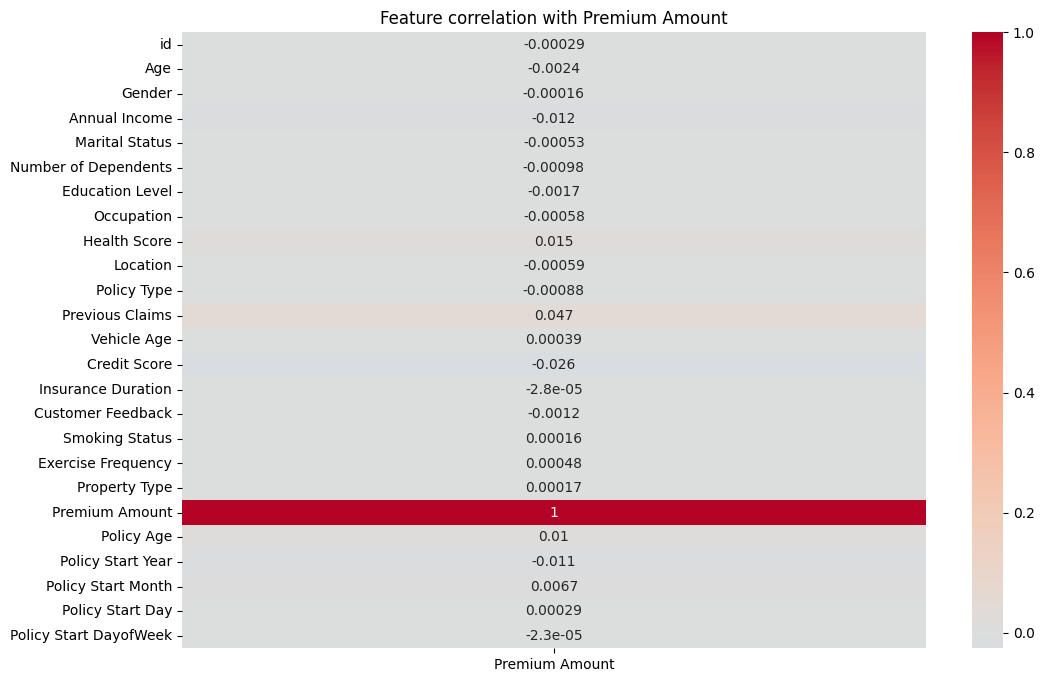

In [41]:
correlations = df.corr()['Premium Amount']
plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', center = 0)
plt.title('Feature correlation with Premium Amount')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_features = ['Age','Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Policy Age', 'Number of Dependents', 'Previous Claims', 'Insurance Duration' ]
num_df = df[numerical_features]

scaled_data = scaler.fit_transform(num_df)
df[numerical_features] = scaled_data

In [43]:
df.sample(2)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Age,Policy Start Year,Policy Start Month,Policy Start Day,Policy Start DayofWeek
911749,911749,1.170938,0,-0.368658,0.0,-0.712557,0,2.0,-0.416835,0,1,NaN,-1.137409,-1.059624,0.763889,2.0,1,0,0,1498.0,0.584100,2021,4,14,2
217853,217853,NaN,0,0.354940,1.0,0.698540,1,2.0,0.781674,2,2,-0.002736,-1.310534,-1.039621,0.763889,0.0,1,3,1,1333.0,0.213971,2021,10,24,6


In [44]:
print(df['Insurance Duration'].unique())

[-0.00702269 -1.1633905  -0.77793456 -1.54884644 -0.39247863  0.37843324
  1.14934512  1.53480105  0.76388918         nan]


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1181295 non-null  float64
 2   Gender                  1200000 non-null  int64  
 3   Annual Income           1155051 non-null  float64
 4   Marital Status          1181471 non-null  float64
 5   Number of Dependents    1090328 non-null  float64
 6   Education Level         1200000 non-null  int64  
 7   Occupation              841925 non-null   float64
 8   Health Score            1125924 non-null  float64
 9   Location                1200000 non-null  int64  
 10  Policy Type             1200000 non-null  int64  
 11  Previous Claims         835971 non-null   float64
 12  Vehicle Age             1199994 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  In

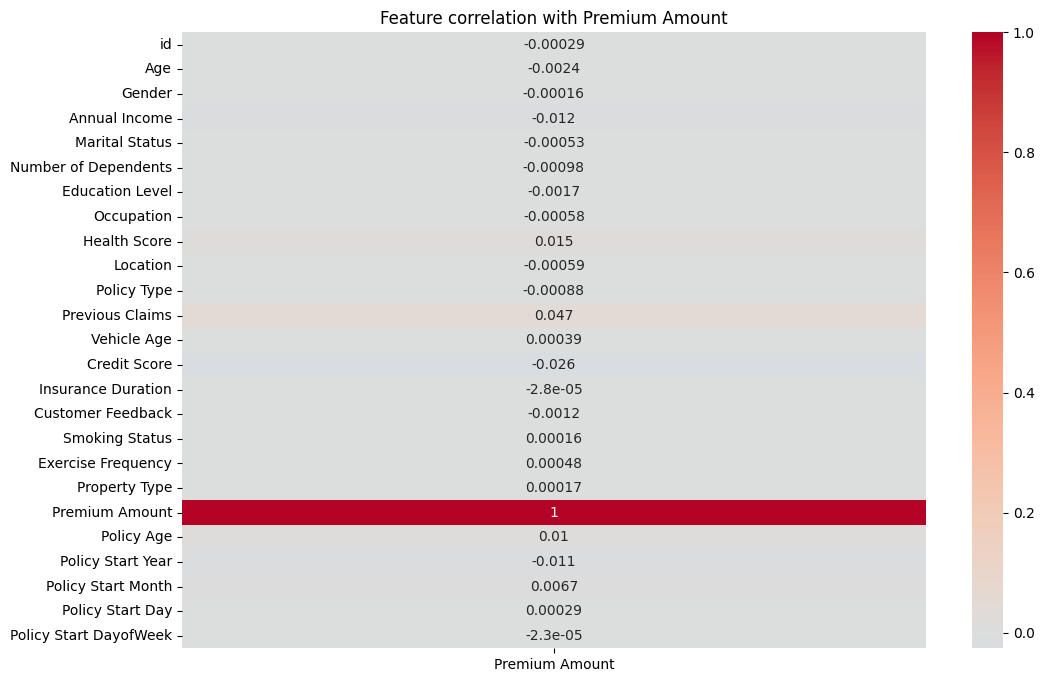

In [46]:
correlations = df.corr()['Premium Amount']
plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', center = 0)
plt.title('Feature correlation with Premium Amount')
plt.show()

## filling in missing values

In [47]:
# from sklearn.impute import KNNImputer

# features_with_missing = ['Age', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Occupation', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Customer Feedback'] # Add all features with missing values

# imputer = KNNImputer(n_neighbors=5)
# imputed_data = imputer.fit_transform(df[features_with_missing])
# df[features_with_missing] = imputed_data

In [48]:
# from sklearn.impute import SimpleImputer

# num_features = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Number of Dependents', 'Previous Claims', 'Insurance Duration']
# cat_features = ['Marital Status', 'Occupation', 'Customer Feedback', ]

# num_imputer = SimpleImputer(strategy='mean') # or 'median'
# cat_imputer = SimpleImputer(strategy='most_frequent')

# df[num_features] = num_imputer.fit_transform(df[num_features])
# df[cat_features] = cat_imputer.fit_transform(df[cat_features])

In [49]:
df.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


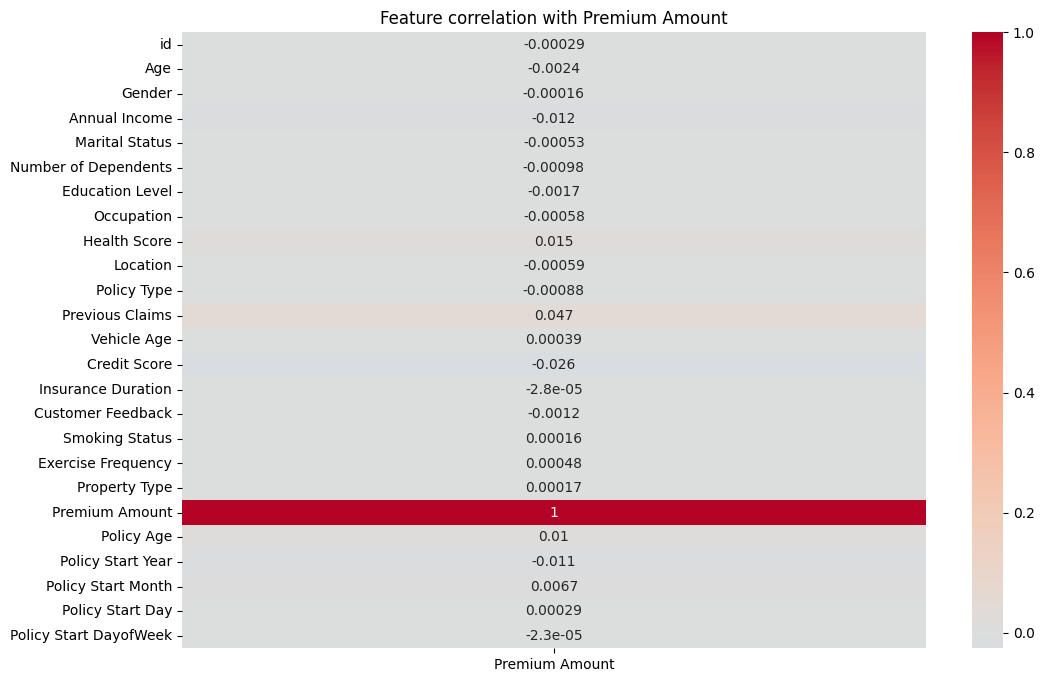

In [50]:
correlations = df.corr()['Premium Amount']
plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', center = 0)
plt.title('Feature correlation with Premium Amount')
plt.show()

In [51]:
X = df.drop('Premium Amount', axis=1)
y = df['Premium Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Create a Pipeline

In [52]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=100,             # Number of boosting trees
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting
    max_depth=3,                  # Maximum depth of each tree
    # ... (other hyperparameters you want to tune) ...
)

## 4. Train the Model

In [54]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred = xgb_reg.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 719597.5632351367


In [57]:
import numpy as np

def rmsle(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Ensure that predicted values are greater than or equal to 0
    y_pred = np.maximum(y_pred, 0)

    # Apply log transformation
    log_true = np.log1p(y_true) # Taking log(1+y) for cases where y_true might be 0
    log_pred = np.log1p(y_pred) # Taking log(1+y) for cases where y_pred might be 0

    # Calculate squared differences
    squared_errors = (log_true - log_pred)**2

    # Calculate RMSLE
    rmsle = np.sqrt(np.mean(squared_errors))

    return rmsle

In [58]:
# ... (your model training and prediction code) ...

# Calculate RMSLE
rmsle_score = rmsle(y_test, y_pred)  # Using your test data and predictions

print("RMSLE:", rmsle_score)

RMSLE: 1.1509923186462923


##data test processing

In [59]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [60]:
dt['Occupation'] = dt['Occupation'].map(occupation_mapping)
dt['Marital Status'] = dt['Marital Status'].map(marital_mapping)
dt['Education Level'] = dt['Education Level'].map(education_mapping)
dt['Location'] = dt['Location'].map(location_mapping)
dt['Policy Type'] = dt['Policy Type'].map(policy_mapping)
dt['Exercise Frequency'] = dt['Exercise Frequency'].map(exerciseFreq_mapping)
dt['Property Type'] = dt['Property Type'].map(property_mapping)
dt['Gender'] = dt['Gender'].map(gender_mapping)
dt['Customer Feedback'] = dt['Customer Feedback'].map(feedback_mapping)
dt['Smoking Status'] = dt['Smoking Status'].map(smoking_mapping)

In [61]:
dt.sample()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
443767,1643767,48.0,1,11413.0,1.0,3.0,3,2.0,36.964092,2,1,0.0,18.0,533.0,9.0,2020-01-21 15:21:39.180553,1.0,0,2,0


In [62]:
dt['Policy Start Date'] = pd.to_datetime(dt['Policy Start Date'])
dt['Policy Age'] = (pd.Timestamp.now() - dt['Policy Start Date']).dt.days # Policy age in days
dt['Policy Start Year'] = dt['Policy Start Date'].dt.year
dt['Policy Start Month'] = dt['Policy Start Date'].dt.month
dt['Policy Age'] = (pd.Timestamp.now() - dt['Policy Start Date']).dt.days
dt['Policy Start Day'] = dt['Policy Start Date'].dt.day
dt['Policy Start DayofWeek'] = dt['Policy Start Date'].dt.dayofweek

dt.drop('Policy Start Date', axis=1, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1200000 non-null  int64  
 1   Age                     1181295 non-null  float64
 2   Gender                  1200000 non-null  int64  
 3   Annual Income           1155051 non-null  float64
 4   Marital Status          1181471 non-null  float64
 5   Number of Dependents    1090328 non-null  float64
 6   Education Level         1200000 non-null  int64  
 7   Occupation              841925 non-null   float64
 8   Health Score            1125924 non-null  float64
 9   Location                1200000 non-null  int64  
 10  Policy Type             1200000 non-null  int64  
 11  Previous Claims         835971 non-null   float64
 12  Vehicle Age             1199994 non-null  float64
 13  Credit Score            1062118 non-null  float64
 14  In

In [64]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      800000 non-null  int64  
 1   Age                     787511 non-null  float64
 2   Gender                  800000 non-null  int64  
 3   Annual Income           770140 non-null  float64
 4   Marital Status          787664 non-null  float64
 5   Number of Dependents    726870 non-null  float64
 6   Education Level         800000 non-null  int64  
 7   Occupation              560875 non-null  float64
 8   Health Score            750551 non-null  float64
 9   Location                800000 non-null  int64  
 10  Policy Type             800000 non-null  int64  
 11  Previous Claims         557198 non-null  float64
 12  Vehicle Age             799997 non-null  float64
 13  Credit Score            708549 non-null  float64
 14  Insurance Duration  

In [65]:
# Assuming you already have your scaler and numerical_features defined as before
# ...

# Scale the numerical features in dt using the same scaler
num_dt = dt[numerical_features]  # Select numerical features from dt
scaled_data_dt = scaler.transform(num_dt)  # Use transform, not fit_transform
dt[numerical_features] = scaled_data_dt  # Update dt with scaled values

## 5. Evaluate the Model

## Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [66]:
id = sf['id']  # Get the correct 'id' column from sf
y_pred = xgb_reg.predict(dt)

submission_df = pd.DataFrame({
    'id': id,
    'Premium Amount': y_pred
})

submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


In [67]:
submission_df = pd.read_csv('submission_file.csv')
duplicate_ids = submission_df[submission_df.duplicated(subset=['id'], keep=False)]
print(duplicate_ids)


Empty DataFrame
Columns: [id, Premium Amount]
Index: []


In [68]:
df.isnull().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0
